<a href="https://colab.research.google.com/github/Carol-Nunes/YOLOv3-custom-training/blob/main/C%C3%B3pia_de_YOLO_custom_training_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Montando o Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


# Clonando o Darknet

In [ ]:
!git clone 'https://github.com/AlexeyAB/darknet.git' '/content/gdrive/My Drive/Mascara_Carol/darknet'

Cloning into '/content/gdrive/My Drive/Mascara_Carol/darknet'...
remote: Enumerating objects: 15873, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 15873 (delta 12), reused 7 (delta 7), pack-reused 15850 (from 3)
Receiving objects: 100% (15873/15873), 14.50 MiB | 14.55 MiB/s, done.
Resolving deltas: 100% (10679/10679), done.
Updating files: 100% (2055/2055), done.


In [ ]:
# Compilar Darknet usando GPU: fazer alterações no makefile, GPU, CUDNN, OPENCV=1

%cd /content/gdrive/MyDrive/Mascara_Carol/darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!make

/content/gdrive/MyDrive/Mascara_Carol/darknet
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: warni

# Atualizar o arquivo CFG da YOLO V3 para treinamento

In [ ]:
# Fazendo uma cópia do arquivo CFG para que seja possível fazer as alterações necessárias

!cp cfg/yolov3.cfg cfg/yolov3_custom_training.cfg

In [ ]:
# Fazendo as alterações necessárias

!sed -i 's/batch=1/batch=32/' cfg/yolov3_custom_training.cfg
!sed -i 's/subdivisions=1/subdivisions=8/' cfg/yolov3_custom_training.cfg
!sed -i 's/max_batches = 500200/max_batches=4000/' cfg/yolov3_custom_training.cfg
!sed -i '610 s@classes=80@classes=2@' cfg/yolov3_custom_training.cfg
!sed -i '696 s@classes=80@classes=2@' cfg/yolov3_custom_training.cfg
!sed -i '783 s@classes=80@classes=2@' cfg/yolov3_custom_training.cfg
!sed -i '603 s@filters=255@filters=21@' cfg/yolov3_custom_training.cfg
!sed -i '689 s@filters=255@filters=21@' cfg/yolov3_custom_training.cfg
!sed -i '776 s@filters=255@filters=21@' cfg/yolov3_custom_training.cfg


In [ ]:
# Para treinamento é preciso comentar o tamanho e a subdivisão do lote de teste

!sed -i '3 s@batch=1@# batch=1@' cfg/yolov3_custom_training.cfg
!sed -i '4 s@subdivisions=1@# subdivisions=1@' cfg/yolov3_custom_training.cfg
!sed -i '6 s@# batch=64@batch=64@' cfg/yolov3_custom_training.cfg
!sed -i '7 s@# subdivisions=16@subdivisions=16@' cfg/yolov3_custom_training.cfg

# Configurar os arquivos de configuração de dados

In [ ]:
# Caminho para o diretório onde o arquivo será salvo
images_dir = '/content/gdrive/MyDrive/Mascara_Carol/dataset'

# Lista de classes que você deseja adicionar ao arquivo 'classes.names'
classes = ['no_mask', 'mask']

# Criar e escrever no arquivo 'classes.names'
with open(images_dir + '/classes.names', 'w') as file:
    for class_name in classes:
        file.write(class_name + '\n')

# Criando o arquivo path_data.data

In [ ]:
with open('/content/gdrive/MyDrive/Mascara_Carol' + '/path_data.data', 'w') as content:

    content.write('classes = 2\n')

    # Localização do arquivo train.txt
    content.write('train = ' + '/content/gdrive/MyDrive/Mascara_Carol/dataset' + '/train.txt\n')

    # Localização do arquivo test.txt
    content.write('valid = ' + '/content/gdrive/MyDrive/Mascara_Carol/dataset' + '/test.txt\n')

    # Localização do arquivo classes.names
    content.write('names = ' + '/content/gdrive/MyDrive/Mascara_Carol/dataset' + '/classes.names\n')

    # Localizaçao da pasta de backup
    content.write('backup = backup')


In [ ]:
# Criação da pasta de backup

!mkdir /content/gdrive/MyDrive/Mascara_Carol/backup

mkdir: cannot create directory ‘/content/gdrive/MyDrive/Mascara_Carol/backup’: File exists


# Redimensionamento das imagens

In [ ]:
import os
from PIL import Image

input_folder = '/content/gdrive/MyDrive/Mascara_Carol/dataset/train'
output_folder = '/content/gdrive/MyDrive/Mascara_Carol/dataset/output_images'

for filename in os.listdir(input_folder):
    if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
        image_path = os.path.join(input_folder, filename)

        with Image.open(image_path) as img:

             gray_image = img.convert('L')
             gray_image.save(os.path.join(output_folder, filename))


# Criando os arquivos train.txt e test.txt

In [ ]:
import os

all_images = [os.path.join('/content/gdrive/MyDrive/Mascara_Carol/dataset/output_images', img) for img in os.listdir('/content/gdrive/MyDrive/Mascara_Carol/dataset/output_images') if img.endswith(('.png', '.jpeg'))]

# Definir o conjunto de teste e de treino (85% treino e 15% teste)

train_size = int(0.85 * len(all_images))

train_images = all_images[:train_size]
test_images = all_images[train_size:]

# Caminho completo das imagens e seus rótulos

train_images_paths = [os.path.join('/content/gdrive/MyDrive/Mascara_Carol/dataset/output_images', img) for img in train_images]
test_images_paths = [os.path.join('/content/gdrive/MyDrive/Mascara_Carol/dataset/output_images', img) for img in test_images]

train_labels_paths = [os.path.join('/content/gdrive/MyDrive/Mascara_Carol/dataset/classes.txt', img.split('/')[-1].replace('.png', '.txt').replace('.jpeg', '.txt')) for img in train_images]
test_labels_paths = [os.path.join('/content/gdrive/MyDrive/Mascara_Carol/dataset/classes.txt', img.split('/')[-1].replace('.png', '.txt').replace('.jpeg', '.txt')) for img in test_images]

# Criar arquivo train.txt

with open('/content/gdrive/MyDrive/Mascara_Carol/dataset/train.txt', 'w') as f:
     for img_path, label_path in zip(train_images_paths, train_labels_paths):
            f.write(f"{img_path}\n")

# Criar arquivo test.txt

with open('/content/gdrive/MyDrive/Mascara_Carol/dataset/test.txt', 'w') as f:
     for img_path, label_path in zip(test_images_paths, test_labels_paths):
            f.write(f"{img_path}\n")


# Cálculo dos pesos

In [ ]:
# Aqui será usado o Transfer Learning

!wget -P '/content/gdrive/MyDrive/Mascara_Carol/custom_weights' 'https://pjreddie.com/media/files/darknet53.conv.74'

--2025-02-19 20:11:41--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘/content/gdrive/MyDrive/Mascara_Carol/custom_weights/darknet53.conv.74.1’

darknet53.conv.74.1 100%[===================>] 154.96M  20.3MB/s    in 8.0s    

2025-02-19 20:11:49 (19.5 MB/s) - ‘/content/gdrive/MyDrive/Mascara_Carol/custom_weights/darknet53.conv.74.1’ saved [162482580/162482580]



# Início do Treinamento

In [5]:
%cd /content/gdrive/MyDrive/Mascara_Carol/darknet
!chmod +x ./darknet

/content/gdrive/.shortcut-targets-by-id/1bQLH6NSHAtWs8r6VoXN0SuUwFhrHAGqP/Mascara_Carol/darknet


In [6]:
!./darknet detector train /content/gdrive/MyDrive/Mascara_Carol/path_data.data  /content/gdrive/MyDrive/Mascara_Carol/darknet/cfg/yolov3_custom_training.cfg /content/gdrive/MyDrive/Mascara_Carol/darknet/backup/yolov3_custom_training_last.weights -dont_show

A saída de streaming foi truncada nas últimas 5000 linhas.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.786027), count: 5, class_loss = 0.393356, iou_loss = 0.316367, total_loss = 0.709723 
 total_bbox = 41206, rewritten_bbox = 0.388293 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.814946), count: 2, class_loss = 0.000236, iou_loss = 0.025337, total_loss = 0.025573 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.812307), count: 4, class_loss = 0.272707, iou_loss = 0.152233, total_loss = 0.424940 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.005557, iou_loss = 0.000000, total_loss = 0.005557 
 total_bbox = 41212, rewritten_bbox = 0.388236 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.749901), count: 2, class_loss = 0.003168, iou_loss = 0.055869, total_loss = 0.059038 

# Testando

In [7]:
# Comentando os parâmetros de treinamento

!sed -i '3 s@# batch=64@batch=1@' cfg/yolov3_custom_training.cfg
!sed -i '4 s@# subdivisions=16@subdivisions=1@' cfg/yolov3_custom_training.cfg
!sed -i '6 s@batch=64@#batch=64@' cfg/yolov3_custom_training.cfg
!sed -i '7 s@subdivisions=16@#subdivisions=16@' cfg/yolov3_custom_training.cfg


In [78]:
# Carregando o modelo, as classes e os pesos

import numpy as np
import time
import cv2

input_file = '/content/gdrive/MyDrive/Mascara_Carol/dataset/test/Untitled-design-13.png'
labels_file = '/content/gdrive/MyDrive/Mascara_Carol/dataset/classes.names'
config_file = '/content/gdrive/MyDrive/Mascara_Carol/darknet/cfg/yolov3_custom_training.cfg'
weights_file = '/content/gdrive/MyDrive/Mascara_Carol/darknet/backup/yolov3_custom_training_final.weights'
confidence_threshold = 0.5

classes = open(labels_file).read().strip().split("\n")

net = cv2.dnn.readNetFromDarknet(config_file, weights_file)


In [79]:
# Lendo a imagem de entrada e processando-a para a darknet

image = cv2.imread(input_file)
(H, W) = image.shape[:2]

In [80]:
# Convertendo a imagem de entrada para o formato que YOLO Net aceita

blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)
start = time.time()
layersOutputs = net.forward(net.getUnconnectedOutLayersNames())
end = time.time()

print("Tempo de processamento: {:.6f} segundos".format(end - start))

Tempo de processamento: 2.081930 segundos


In [81]:
# Determinedo apenas os nomes das camdas de saída que precisamos do YOLO

ln = net.getLayerNames()
ln = [ln[i-1] for i in net.getUnconnectedOutLayers()]

Detection Image Result


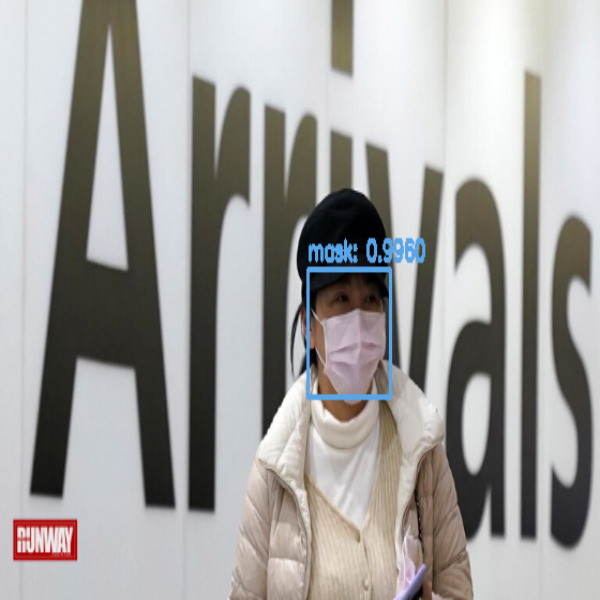

In [82]:
 # Prevendo e desenhando as caixas previstas
from google.colab.patches import cv2_imshow

boxes =[]
confidences = []
classIDs = []

for output in layersOutputs:
    for detection in output:
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]

        if confidence > confidence_threshold:
            box = detection[0:4] * np.array([W, H, W, H])
            (centerX, centerY, width, height) = box.astype("int")

            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))

            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            classIDs.append(classID)


idxs = cv2.dnn.NMSBoxes(boxes, confidences, confidence_threshold, confidence_threshold)

colors = np.random.uniform(0, 255, size=(len(classes), 3))

if len(idxs) > 0:
    for i in idxs.flatten():
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])

        color = [int(c) for c in colors[classIDs[i]]]

        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        text = "{}: {:.4f}".format(classes[classIDs[i]], confidences[i])
        cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

print("Detection Image Result")
image = cv2.resize(image, (600, 600))
cv2_imshow(image)